# Final Project CS209b
## EDA Flu data: clustering -- April 13
### Benjamin Levy, Will Fried, Dimitris Vamvourellis & Matthieu Meeus

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [27]:
# open all csv files and save them in one dataframe
data = pd.DataFrame()
directory = '../flu_ground_truth'
for filename in os.listdir(directory):
    if data.empty:
        state = filename[13:-4]
        data = pd.read_csv(directory + '/' + filename)
        data.rename(columns={"wili": state}, inplace = True)
    else:
        state = filename[13:-4]
        state_data = pd.read_csv(directory + '/' + filename)
        data[state] = state_data['wili']  

In [28]:
data

,time,Texas,Louisiana,Washington,New Jersey,Arkansas,Montana,North Dakota,Virgin Islands,Nebraska,...,Nevada,Idaho,Utah,Virginia,New York,District of Columbia,Oklahoma,South Dakota,New York City,Colorado
0,2010-40,2.06514,2.28108,0.510041,2.31534,0.696056,0.037119,0.671355,0.000100,2.199780,...,1.666830,0.414938,0.747696,1.143430,0.262990,2.808770,0.624179,1.102750,1.18222,0.660684
1,2010-41,2.09394,2.04776,1.040070,2.47836,0.674157,0.180963,0.721961,0.000100,2.735320,...,1.636330,1.457980,0.410939,1.236530,0.369729,2.890790,0.958678,0.793794,1.40230,0.628621
2,2010-42,2.10072,2.42974,0.904393,2.24812,0.514217,0.185874,0.567477,0.000100,3.311030,...,1.508600,1.408140,0.440583,1.225450,0.362121,2.410420,2.070390,0.791023,1.29124,0.804020
3,2010-43,2.20655,1.92854,0.955110,2.79286,0.413650,0.036390,0.339239,0.000100,2.057610,...,2.144510,1.280070,0.755957,1.269020,0.358981,3.116320,1.670730,0.801311,1.30236,0.909658
4,2010-44,2.36381,2.80934,0.786370,1.82877,1.090280,0.040519,0.713749,0.000100,0.376712,...,1.767610,1.827240,0.651859,1.265470,0.527357,2.991180,1.628450,0.779833,1.51508,0.971705
5,2010-45,2.51778,2.08577,1.067240,2.20310,1.197360,0.243902,0.758110,0.000100,2.961080,...,0.805239,1.494340,0.663900,1.411650,0.504756,2.329510,2.574530,0.743424,1.73829,0.719015
6,2010-46,2.24622,2.81506,1.331320,2.13716,1.554620,0.109930,0.644192,0.000100,2.423030,...,2.632760,1.958820,0.907845,1.532420,0.503441,1.584400,3.350680,1.001360,1.92684,0.696032
7,2010-47,2.59866,2.92706,1.873330,2.41758,2.025990,0.537057,0.590551,0.000100,0.614754,...,3.101980,3.068820,0.743569,1.627260,0.549190,3.335190,2.652300,0.891996,2.33103,0.754401
8,2010-48,2.56617,2.66482,0.981767,2.60116,1.392950,0.038052,0.347088,0.000100,2.815700,...,2.890430,1.801420,0.838308,1.571460,1.625910,4.158960,2.144770,1.107140,2.54207,0.849729
9,2010-49,2.40335,2.80486,0.964630,2.65371,1.020640,0.035945,0.237530,0.000100,2.462120,...,3.282790,1.722670,1.164920,1.699370,2.162900,3.260520,2.336230,1.163210,2.73001,0.809504


In [29]:
data.shape

(461, 54)

Text(0.5, 1.0, 'Flu infection rate over time since week 40 of 2010')

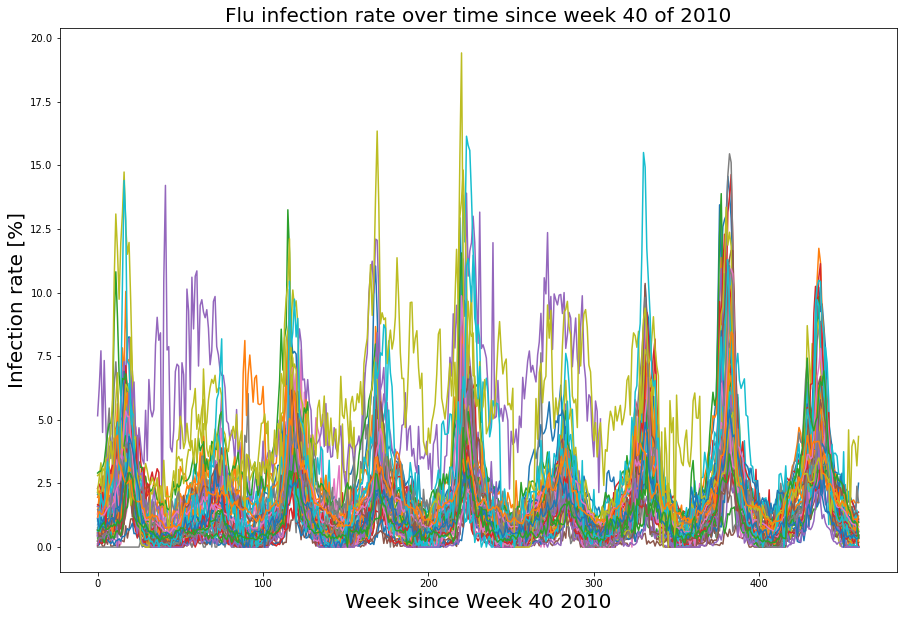

In [30]:
plt.figure(figsize = (15,10))
for state_name in data.columns:
    if state_name != 'time':
        plt.plot(range(len(data)), data[state_name])
plt.xlabel('Week since Week 40 2010', fontsize = 20)
plt.ylabel('Infection rate [%]', fontsize = 20)
plt.title('Flu infection rate over time since week 40 of 2010', fontsize = 20)

### 1. Let's try some PCA

In [31]:
# check the NaN
nans = []
for state_name in data.columns:
    if state_name != 'time':
        nans_state = data[state_name].isna().sum()
        if nans_state != 0:
            print('For {}, there are {} NaNs'.format(state_name, nans_state))
        nans.append(nans_state)

For Virgin Islands, there are 52 NaNs
For Puerto Rico, there are 156 NaNs


In [21]:
data['Puerto Rico'].mean()

3.9015393492407835

In [35]:
# we will now fill in these Nans with 0
data['Puerto Rico'].fillna(data['Puerto Rico'].mean(), inplace = True)
data['Virgin Islands'].fillna(data['Virgin Islands'].mean(), inplace = True)


In [36]:
# get the value without the time
X = data.values[:,1:]
X

array([[2.06514, 2.2810799999999998, 0.510041, ..., 1.10275, 1.18222,
        0.660684],
       [2.0939400000000004, 2.04776, 1.04007, ..., 0.793794, 1.4023,
        0.628621],
       [2.10072, 2.4297400000000002, 0.904393, ..., 0.7910229999999999,
        1.29124, 0.80402],
       ...,
       [1.49702, 1.7303099999999998, 0.26504099999999997, ..., 0.368135,
        1.1004, 0.99995],
       [1.79673, 1.7629, 0.36384, ..., 0.316957, 1.0466, 0.921444],
       [2.51025, 1.74522, 0.195914, ..., 0.37905700000000003, 1.21507,
        0.36640700000000004]], dtype=object)

In [37]:
# get the value without the time
# note that the matrix is transposed, as we want to 
# perform PCA/clustering with respect to the columns (states)
X = data.values[:,1:].T
pca_object = PCA(n_components = 2)
pca_object.fit(X)
X_pca = pca_object.transform(X)

In [38]:
data.columns[1:]

Index(['Texas', 'Louisiana', 'Washington', 'New Jersey', 'Arkansas', 'Montana',
       'North Dakota', 'Virgin Islands', 'Nebraska', 'New Mexico', 'Indiana',
       'California', 'Ohio', 'South Carolina', 'Puerto Rico', 'Rhode Island',
       'Michigan', 'Georgia', 'Wyoming', 'Hawaii', 'New Hampshire', 'Maryland',
       'Mississippi', 'Connecticut', 'West Virginia', 'Iowa', 'Illinois',
       'Vermont', 'Tennessee', 'Missouri', 'Wisconsin', 'North Carolina',
       'Pennsylvania', 'Kentucky', 'Delaware', 'Kansas', 'Oregon',
       'Massachusetts', 'Alabama', 'Alaska', 'Arizona', 'Minnesota', 'Maine',
       'Nevada', 'Idaho', 'Utah', 'Virginia', 'New York',
       'District of Columbia', 'Oklahoma', 'South Dakota', 'New York City',
       'Colorado'],
      dtype='object')

Text(0.5, 1.0, 'Entire dataset in its two first principle components')

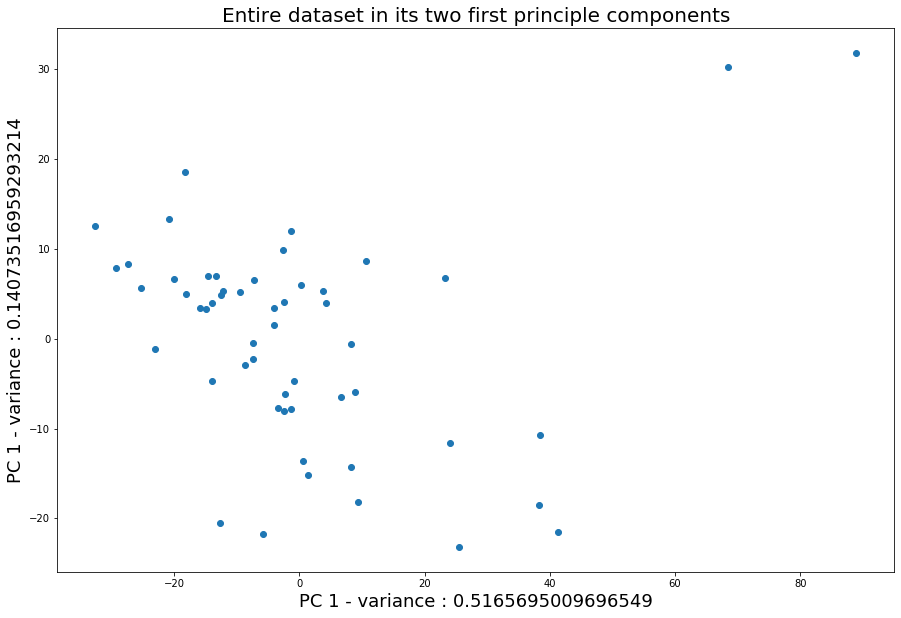

In [39]:
plt.figure(figsize = (15,10))
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('PC 1 - variance : {}'.format(pca_object.explained_variance_ratio_[0]), fontsize=18)
plt.ylabel('PC 1 - variance : {}'.format(pca_object.explained_variance_ratio_[1]), fontsize=18)
plt.title('Entire dataset in its two first principle components',fontsize=20)

## 2. Let's try some KMeans clustering

In [13]:
kmeans_obj = KMeans(n_clusters=5, init='random', n_init=5, random_state=109)
kmeans_obj.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=5, n_jobs=None, precompute_distances='auto', random_state=109,
       tol=0.0001, verbose=0)

In [14]:
kmeans_obj.labels_.shape

(53,)

Text(0.5, 1.0, 'PCA plot of KMeans with k = 5')

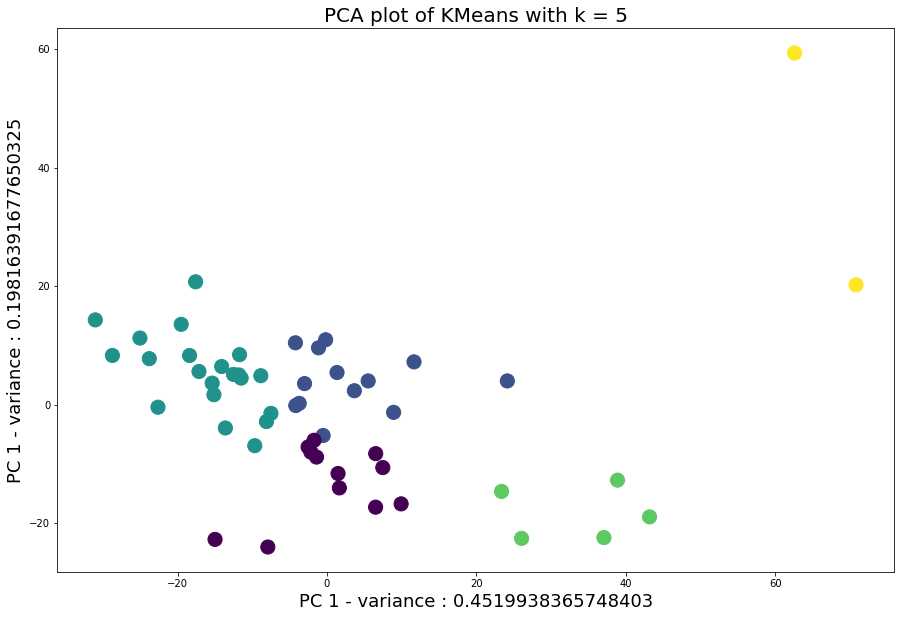

In [15]:
plt.figure(figsize = (15,10))
plt.scatter(X_pca[:,0], X_pca[:,1], c = kmeans_obj.labels_, s = 200)
plt.xlabel('PC 1 - variance : {}'.format(pca_object.explained_variance_ratio_[0]), fontsize=18)
plt.ylabel('PC 1 - variance : {}'.format(pca_object.explained_variance_ratio_[1]), fontsize=18)
plt.title('PCA plot of KMeans with k = 5',fontsize=20)

Text(0.5, 1.0, 'Flu infection rate over time since week 40 of 2010')

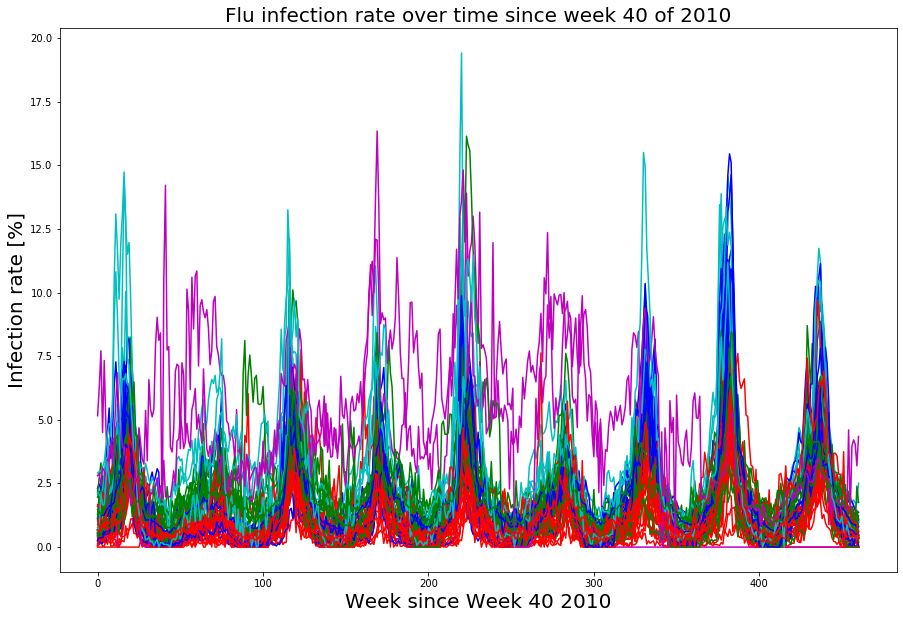

In [16]:
colors = ['b', 'g', 'r', 'c', 'm']
plt.figure(figsize = (15,10))
for i, state_name in enumerate(data.columns[1:]):
    cluster = kmeans_obj.labels_[i]
    plt.plot(range(len(data)), data[state_name], color = colors[cluster], label = cluster)
plt.xlabel('Week since Week 40 2010', fontsize = 20)
plt.ylabel('Infection rate [%]', fontsize = 20)
plt.title('Flu infection rate over time since week 40 of 2010', fontsize = 20)

In [17]:
# let's make a df of each cluster and their state names
cluster_df = pd.DataFrame()
cluster_df['State Name'] = data.columns[1:]
cluster_df['Cluster'] = kmeans_obj.labels_
for i in cluster_df.groupby('Cluster'):
    print(i)

(0,         State Name  Cluster
3       New Jersey        0
4         Arkansas        0
10         Indiana        0
13  South Carolina        0
17         Georgia        0
28       Tennessee        0
29        Missouri        0
31  North Carolina        0
33        Kentucky        0
35          Kansas        0
46        Virginia        0
47        New York        0)
(1,        State Name  Cluster
8        Nebraska        1
9      New Mexico        1
11     California        1
19         Hawaii        1
21       Maryland        1
26       Illinois        1
27        Vermont        1
32   Pennsylvania        1
40        Arizona        1
41      Minnesota        1
44          Idaho        1
45           Utah        1
51  New York City        1)
(2,         State Name  Cluster
2       Washington        2
5          Montana        2
6     North Dakota        2
7   Virgin Islands        2
12            Ohio        2
15    Rhode Island        2
16        Michigan        2
18         Wyoming  